In [ ]:
import torch
from torch import nn

from PIL import Image
import os

import torchvision
from torchvision import datasets
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader, Dataset

import matplotlib.pyplot as plt

print(torch.__version__)
print(torchvision.__version__)

2.0.1+cu118
0.15.2+cu118


In [ ]:
import pandas as pd

# Getting labels for images
label_data = pd.read_excel('Bike_Crashes.xlsx')
labels = label_data['CRASH CLASSIFICATION DESCRIPTION']
labels

0              Non-Reportable
1       Personal Injury Crash
2       Personal Injury Crash
3              Non-Reportable
4       Personal Injury Crash
                ...          
2605    Personal Injury Crash
2606           Fatality Crash
2607           Non-Reportable
2608    Personal Injury Crash
2609    Personal Injury Crash
Name: CRASH CLASSIFICATION DESCRIPTION, Length: 2610, dtype: object

In [ ]:
unique_labels = labels.unique()
unique_labels = list(unique_labels)

label_nums = list(range(len(unique_labels)))
label_nums, unique_labels


([0, 1, 2, 3],
 ['Non-Reportable',
  'Personal Injury Crash',
  'Property Damage Only',
  'Fatality Crash'])

In [ ]:
labels = [unique_labels.index(label) for label in labels]
labels

[0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 3,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 0,
 1,
 2,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 3,
 0,
 1,
 1,
 1,
 3,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 2,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 2,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 2,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 1,
 0,
 1,
 2,
 1,
 1,


In [ ]:
folder_path = '/content/drive/MyDrive/Bike_Crash_Images'

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
# Making custom dataset

class BikeCrashDataset(torch.utils.data.Dataset):
  def __init__(self, folder_path, labels=None, transform=None):
    self.folder_path = folder_path
    self.image_files = sorted(os.listdir(folder_path))
    self.labels = labels
    self.transform = transform

  def __getitem__(self, index):
      image_path = os.path.join(self.folder_path, self.image_files[index])
      image = Image.open(image_path).convert("RGB")

      if self.transform:
          image = self.transform(image)

      if self.labels is not None:
          label = self.labels[index]
          return image, label
      else:
          return image

  def __len__(self):
    return len(self.image_files)

# Make an instance
dataset = BikeCrashDataset(folder_path, labels=labels, transform=transform)

In [ ]:
unique_labels[labels[530]]

'Personal Injury Crash'

In [ ]:
dataset.__getitem__(530)

(tensor([[[0.9725, 0.9725, 0.9725,  ..., 0.9725, 0.9725, 0.9725],
          [0.9725, 0.9725, 0.9725,  ..., 0.9725, 0.9725, 0.9725],
          [0.9725, 0.9725, 0.9725,  ..., 0.9725, 0.9725, 0.9725],
          ...,
          [0.9725, 0.9725, 0.9725,  ..., 0.9451, 0.9451, 0.9451],
          [0.9725, 0.9725, 0.9725,  ..., 0.9451, 0.9451, 0.9451],
          [0.9725, 0.9725, 0.9725,  ..., 0.9451, 0.9451, 0.9451]],
 
         [[0.9765, 0.9765, 0.9765,  ..., 0.9765, 0.9765, 0.9765],
          [0.9765, 0.9765, 0.9765,  ..., 0.9765, 0.9765, 0.9765],
          [0.9765, 0.9765, 0.9765,  ..., 0.9765, 0.9765, 0.9765],
          ...,
          [0.9765, 0.9765, 0.9765,  ..., 0.9529, 0.9529, 0.9529],
          [0.9765, 0.9765, 0.9765,  ..., 0.9529, 0.9529, 0.9529],
          [0.9765, 0.9765, 0.9765,  ..., 0.9529, 0.9529, 0.9529]],
 
         [[0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          [0.9804, 0.9804, 0.9804,  ..., 0.9804, 0.9804, 0.9804],
          [0.9804, 0.9804, 0.9804,  ...,

In [ ]:
from torch.utils.data import random_split

train_ratio = 0.8  # 80% for training data
test_ratio = 0.2   # 20% for testing data

# Calculate the lengths of train and test data based on the ratios
train_len = int(train_ratio * len(dataset))
test_len = len(dataset) - train_len

# Use random_split to perform the split
train_dataset, test_dataset = random_split(dataset, [train_len, test_len])

In [ ]:
from torch.utils.data import DataLoader

batch_size = 32

train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


In [ ]:
dataset.__getitem__(0)[0].shape

torch.Size([3, 1382, 2880])

In [ ]:
len(train_dataset), len(test_dataset)

(2088, 522)

In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

Image size: torch.Size([1382, 2880, 3])
Label: 1


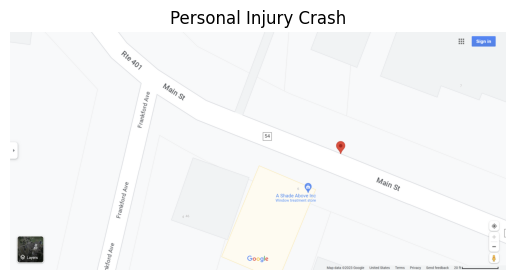

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]

img = np.transpose(img, (1,2,0))
plt.imshow(img.squeeze(), cmap="gray")
plt.title(unique_labels[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}")

## Building Baseline Model

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")


Shape before flattening: torch.Size([3, 1382, 2880]) -> [color_channels, height, width]
Shape after flattening: torch.Size([3, 3980160]) -> [color_channels, height*width]


In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Convolutional neural network

class CrashPredictionModelV0(nn.Module):
  """tinyVGG architecture"""
  def __init__(self, input_shape: int, hidden_units:int, output_shape:int):
    super().__init__()
    self.block_1 = nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,
                     stride=2)
    )
    self.block_2 = nn.Sequential(
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_shape)
    )

  def forward(self, x):
    x = self.block_1(x)

    x = self.block_2(x)

    x = self.classifier(x)

    return x

torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_0 = CrashPredictionModelV0(input_shape=3,
                                 hidden_units=16,
                                 output_shape=len(unique_labels)).to(device)

In [ ]:
model_0

CrashPredictionModelV0(
  (block_1): Sequential(
    (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=16, out_features=4, bias=True)
  )
)

In [ ]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               )
